# Single feature analysis

## 1. Libraries import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats.mstats import winsorize
import json
from Tools_pandas.DataInit import DataInit
from Tools_pandas.DataTransformation import DataTransformation
from Tools_pandas.Model import Model

## 2. Data Initialization

In [2]:
init = DataInit("data/titanic.csv","\t","Survived",0.7)
init.run()

In [3]:
analysis_df = init.df

In [4]:
analysis_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


## 3. Single feature analyis

### Missing values?

In [5]:
for f in analysis_df:
    missing = "{} has {} values missing".format(f, analysis_df[f].isna().sum())
    print(missing)

PassengerId has 0 values missing
Survived has 0 values missing
Pclass has 0 values missing
Name has 0 values missing
Sex has 0 values missing
Age has 30 values missing
SibSp has 0 values missing
Parch has 0 values missing
Ticket has 0 values missing
Fare has 0 values missing
Cabin has 125 values missing
Embarked has 1 values missing


#### Age

Text(0, 0.5, '# of passengers')

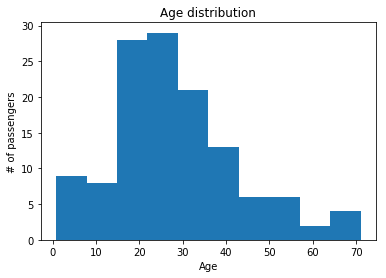

In [9]:
plt.hist(analysis_df['Age'])
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('# of passengers')

In [10]:
age_median = analysis_df['Age'].median()

In [11]:
analysis_df['Age'] = analysis_df['Age'].fillna(analysis_df['Age'].median())

Text(0, 0.5, '# of passengers')

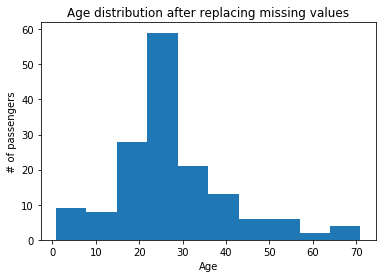

In [14]:
plt.hist(analysis_df['Age'])
plt.title('Age distribution after replacing missing values')
plt.xlabel('Age')
plt.ylabel('# of passengers')

### Survival Rate

AGE

In [15]:
def compute_survival_rate(data, feature, output_flag):
    if '{}_SR'.format(feature) in data.columns:
        data = data.drop(['{}_SR'.format(feature)], axis=1)

    # Get the mean of default (i.e Survival rate) for each distinct value
    grouping = data[[feature, output_flag]].groupby([feature], as_index=False)[output_flag].mean()
    grouping.columns = [feature, '{}_SR'.format(feature)]

    # Merge it to the main self._dataframe
    data = pd.merge(data, grouping, how='left', on=feature)

    return data

In [16]:
analysis_df = compute_survival_rate(analysis_df,'Age','Survived')
analysis_df = analysis_df.sort_values(by=['Age'])

(array([ 9.,  8., 28., 59., 21., 13.,  6.,  6.,  2.,  4.]),
 array([ 0.83 ,  7.847, 14.864, 21.881, 28.898, 35.915, 42.932, 49.949,
        56.966, 63.983, 71.   ]),
 <a list of 10 Patch objects>)

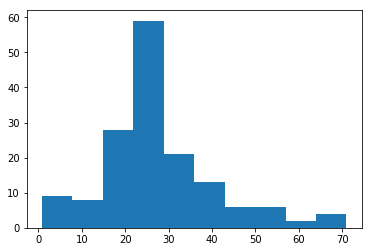

In [17]:
plt.hist(analysis_df['Age'])

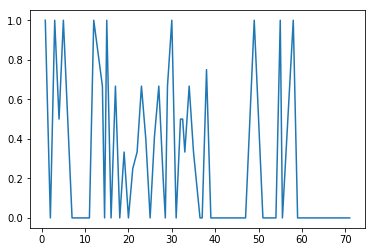

In [18]:
plt.plot(analysis_df['Age'],analysis_df['Age_SR'])

In [39]:
analysis_df['Age_disc'], age_bins = pd.qcut(analysis_df['Age'],q=4,labels=False, retbins=True)

In [40]:
analysis_df = compute_survival_rate(analysis_df,'Age_disc','Survived')
analysis_df = analysis_df.sort_values(by=['Age_disc'])

Text(0.5, 0, 'Age bin ref')

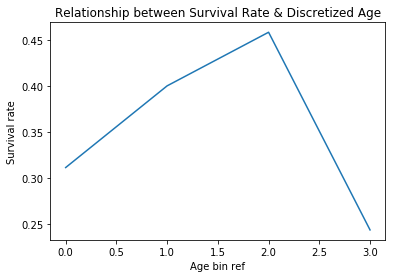

In [42]:
plt.plot(analysis_df['Age_disc'],analysis_df['Age_disc_SR'])
plt.title('Relationship between Survival Rate & Discretized Age')
plt.ylabel('Survival rate')
plt.xlabel('Age bin ref')

In [43]:
age_bins

array([ 0.83, 21.  , 26.  , 33.  , 71.  ])

SEX

In [18]:
analysis_df = compute_survival_rate(analysis_df,'Sex','Survived')
analysis_df = analysis_df.sort_values(by=['Sex'])

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  56.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

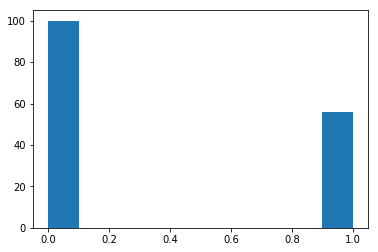

In [19]:
plt.hist(analysis_df['Sex'])

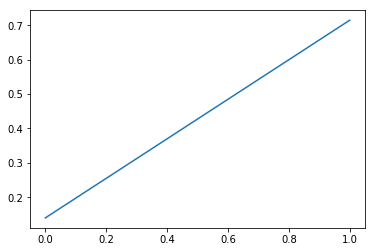

In [20]:
plt.plot(analysis_df['Sex'],analysis_df['Sex_SR'])

FARE

In [21]:
analysis_df = compute_survival_rate(analysis_df,'Fare','Survived')
analysis_df = analysis_df.sort_values(by=['Fare'])

(array([120.,  17.,  15.,   0.,   0.,   1.,   0.,   0.,   0.,   3.]),
 array([  6.75 ,  32.375,  58.   ,  83.625, 109.25 , 134.875, 160.5  ,
        186.125, 211.75 , 237.375, 263.   ]),
 <a list of 10 Patch objects>)

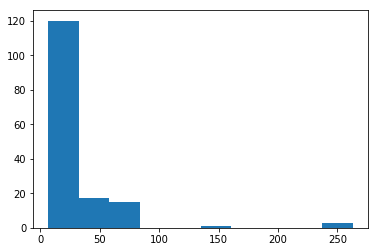

In [22]:
plt.hist(analysis_df['Fare'])

In [23]:
analysis_df['Fare'] = winsorize(analysis_df['Fare'],limits=0.03)

(array([82., 18., 17.,  9.,  2.,  6.,  3.,  5.,  3., 11.]),
 array([ 7.225, 14.85 , 22.475, 30.1  , 37.725, 45.35 , 52.975, 60.6  ,
        68.225, 75.85 , 83.475]),
 <a list of 10 Patch objects>)

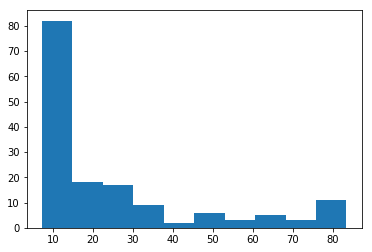

In [24]:
plt.hist(analysis_df['Fare'])

In [25]:
analysis_df = compute_survival_rate(analysis_df,'Fare','Survived')
analysis_df = analysis_df.sort_values(by=['Fare'])

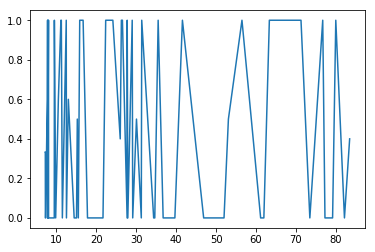

In [26]:
plt.plot(analysis_df['Fare'],analysis_df['Fare_SR'])

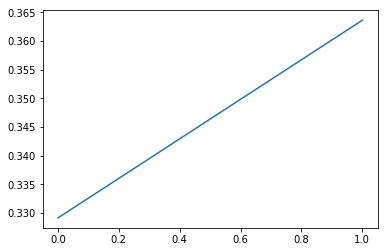

In [46]:
analysis_df['Fare_disc'], fare_bins = pd.qcut(analysis_df['Fare'],q=2,labels=False, retbins=True)
analysis_df = compute_survival_rate(analysis_df,'Fare_disc','Survived')
analysis_df = analysis_df.sort_values(by=['Fare_disc'])
plt.plot(analysis_df['Fare_disc'],analysis_df['Fare_disc_SR'])

In [47]:
fare_bins

array([  6.75  ,  14.4542, 263.    ])

### Analysis conclusion

- Age: replace missing values + discretization
- Sex: no transformation required
- Fare: winsorize + discretize

In [29]:
pipeline_instructions ={
    "Age" : {
        "replace_missings" : {"apply":True, "value": age_median},
        "winsorize" : {"apply": False, "value": None},
        "discretize" : {"apply": False, "value": list(age_bins)}
    },
    "Sex" : {
        "replace_missings" : {"apply":False, "value": None},
        "winsorize" : {"apply": False, "value": None},
        "discretize" : {"apply": False, "value": None}},
    "Fare" : {
        "replace_missings" : {"apply":False, "value": None},
        "winsorize" : {"apply": True, "value": 0.03},
        "discretize" : {"apply": True, "value": list(fare_bins)}}
}

In [30]:
with open('Config/pipeline_instructions.json', 'w') as fp:
    json.dump(pipeline_instructions, fp)

## 4. Data transformation

In [31]:
trans = DataTransformation(init)
trans.run()

## 5. Model

In [32]:
model = Model(trans)
model.run()

[[61 10]
 [16 23]]
